In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd

In [57]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [59]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [60]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [62]:
inspector = inspect(engine)

In [63]:
# Print column names for station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'])
            

id
station
name
latitude
longitude
elevation


In [23]:
# Print column names for measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'])
            

id
station
date
prcp
tobs


In [24]:
# Save references to each table
Meas = Base.classes.measurement
Stations = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [34]:
# Find the most recent date in the data set
session.query(Meas.date).order_by(Meas.date.desc()).first()


('2017-08-23')

In [36]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)


2016-08-23


In [41]:
# Perform a query to retrieve the data and precipitation scores
annual_prcp = session.query(Meas.date,Meas.prcp).filter(Meas.date >= year_ago).all()
annual_prcp


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(annual_prcp)
df.set_index('date', inplace=True, )
# df.head(10)

# Sort the dataframe by date
df.sort_values('date')

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<Figure size 864x720 with 0 Axes>

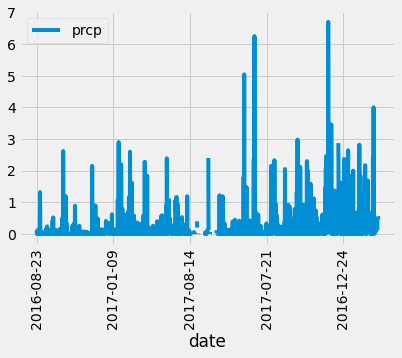

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (12,10))
df.plot()
plt.xticks(rotation = 'vertical')

plt.show()

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Precipitation Analysis

In [50]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Stations.station)).all()

[(9)]

In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Meas.station, func.count(Meas.station)).group_by(Meas.station).order_by(func.count(Meas.date).desc()).all()  

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Meas.tobs), func.max(Meas.tobs), func.avg(Meas.tobs)).filter_by(station = 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

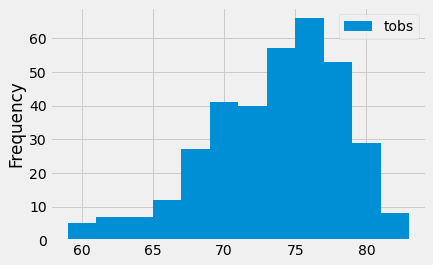

In [72]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tobs = session.query(Meas.date, Meas.tobs).filter(Meas.station == 'USC00519281').filter(Meas.date >= year_ago).all()

WAIHEE_tobs_df = pd.DataFrame(last_year_tobs)
WAIHEE_tobs_df.plot.hist(by=None, bins=12)